In [1]:
# EDA
import pandas as pd
import numpy as np

## date handling
from datetime import datetime, timedelta
from pytz import timezone


# visualizing
import seaborn as sns
import matplotlib.pyplot as plt

# modelling
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor

# accuracy metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# scaling
from sklearn.preprocessing import StandardScaler

# deployment
import pickle as pkl
from sklearn.pipeline import Pipeline

## for ignoring deprecation warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data =pd.read_csv(r'budjet.csv')
data=data.sort_values(['date_time'],ascending=True)
data

,date_time,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50
...,...,...,...
1482,2023-05-24 07:42:46 +0000,Phone,5.00
1483,2023-05-24 10:02:04 +0000,Business lunch,6.00
1484,2023-05-24 16:55:40 +0000,Coffe,24.00
1485,2023-05-24 19:11:54 +0000,Transport,5.00


## Explatory Data Analyse

In [3]:
data['date_time']=pd.to_datetime(data['date_time'])
current_datetime = datetime.now(timezone('UTC'))

In [4]:
data['time_diff'] =(current_datetime - data['date_time']).dt.days
data['hours']=data['date_time'].dt.hour
data['Weekday'] = data['date_time'].dt.weekday
data['Weekday']=data['Weekday']+1
data['Year'] = data['date_time'].dt.year
data['Day_of_Year'] = data['date_time'].dt.dayofyear
data['Month'] = data['date_time'].dt.month
data

,date_time,category,amount,time_diff,hours,Weekday,Year,Day_of_Year,Month
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,325,5,3,2022,187,7
1,2022-07-06 05:57:27+00:00,Market,2.00,325,5,3,2022,187,7
2,2022-07-06 05:58:12+00:00,Coffe,30.10,325,5,3,2022,187,7
3,2022-07-06 05:58:25+00:00,Market,17.33,325,5,3,2022,187,7
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,325,5,3,2022,187,7
...,...,...,...,...,...,...,...,...,...
1482,2023-05-24 07:42:46+00:00,Phone,5.00,3,7,3,2023,144,5
1483,2023-05-24 10:02:04+00:00,Business lunch,6.00,2,10,3,2023,144,5
1484,2023-05-24 16:55:40+00:00,Coffe,24.00,2,16,3,2023,144,5
1485,2023-05-24 19:11:54+00:00,Transport,5.00,2,19,3,2023,144,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1486
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date_time    1487 non-null   datetime64[ns, UTC]
 1   category     1487 non-null   object             
 2   amount       1487 non-null   float64            
 3   time_diff    1487 non-null   int64              
 4   hours        1487 non-null   int64              
 5   Weekday      1487 non-null   int64              
 6   Year         1487 non-null   int64              
 7   Day_of_Year  1487 non-null   int64              
 8   Month        1487 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(6), object(1)
memory usage: 116.2+ KB


In [6]:
data.describe()

,amount,time_diff,hours,Weekday,Year,Day_of_Year,Month
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,13.911991,158.642905,12.200403,4.063215,2022.464694,182.933423,6.525891
std,38.932434,89.297608,4.689862,2.017430,0.498920,115.976208,3.801143
min,0.050000,2.000000,0.000000,1.000000,2022.000000,1.000000,1.000000
25%,4.240000,86.000000,9.000000,2.000000,2022.000000,71.000000,3.000000
50%,6.700000,155.000000,12.000000,4.000000,2022.000000,200.000000,7.000000
75%,10.405000,231.500000,16.000000,6.000000,2023.000000,288.000000,10.000000
max,733.250000,325.000000,21.000000,7.000000,2023.000000,365.000000,12.000000


In [7]:
pd.DataFrame(data['category'].value_counts())

,category
Coffe,475
Market,382
Restuarant,193
Business lunch,103
Transport,84
Taxi,64
Phone,41
Learning,25
Health,23
Clothing,21


In [8]:
print(data.isna().sum())
print(data.duplicated().sum())

date_time      0
category       0
amount         0
time_diff      0
hours          0
Weekday        0
Year           0
Day_of_Year    0
Month          0
dtype: int64
0


In [9]:
df=data[['date_time', 'amount']]
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)

# Calculate the daily average amount
daily_average = df.resample('D').mean()

print(daily_average.max())

amount    203.638889
dtype: float64


In [10]:
weekly_average = df.resample('W').mean()
print(weekly_average.max())

amount    108.8175
dtype: float64


In [11]:
monthly_average = df.resample('M').mean()
print(monthly_average.max())

amount    34.894878
dtype: float64


In [12]:
yearly_average = df.resample('Y').mean()
print(yearly_average.max())

amount    15.275384
dtype: float64


In [13]:
pd.DataFrame(data.groupby(['category'])['amount'].sum()).sort_values(['amount'],ascending=False).head()

,amount
category,
Coffe,3967.85
Restuarant,3687.29
Market,2191.15
Clothing,1715.50
Communal,1676.50


In [14]:
pd.DataFrame(data.groupby(['Year'])['amount'].sum()).sort_values(['amount'],ascending=False)

,amount
Year,
2023,10555.29
2022,10131.84


In [15]:
pd.DataFrame(data.groupby(['Month'])['amount'].sum()).sort_values(['amount'],ascending=False)

,amount
Month,
7,2861.38
5,2352.77
3,2274.61
4,2224.88
1,2162.19
10,2001.12
12,1605.53
2,1540.84
9,1338.48


In [16]:
pd.DataFrame(data.groupby(['Weekday'])['amount'].sum()).sort_values(['amount'],ascending=False)  ## sum

,amount
Weekday,
4,3841.17
6,3440.16
5,2973.84
1,2893.14
3,2755.44
2,2434.16
7,2349.22


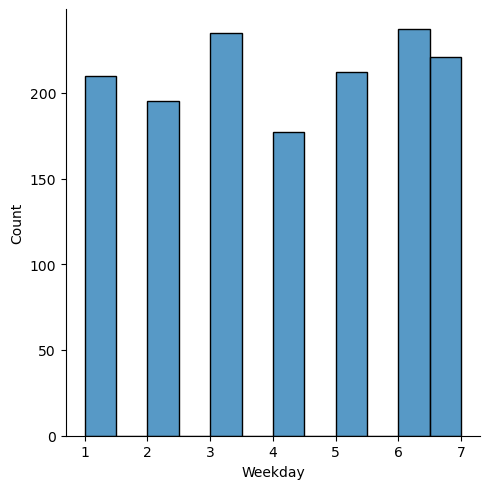

In [17]:
sns.displot(data['Weekday'],kde=False)

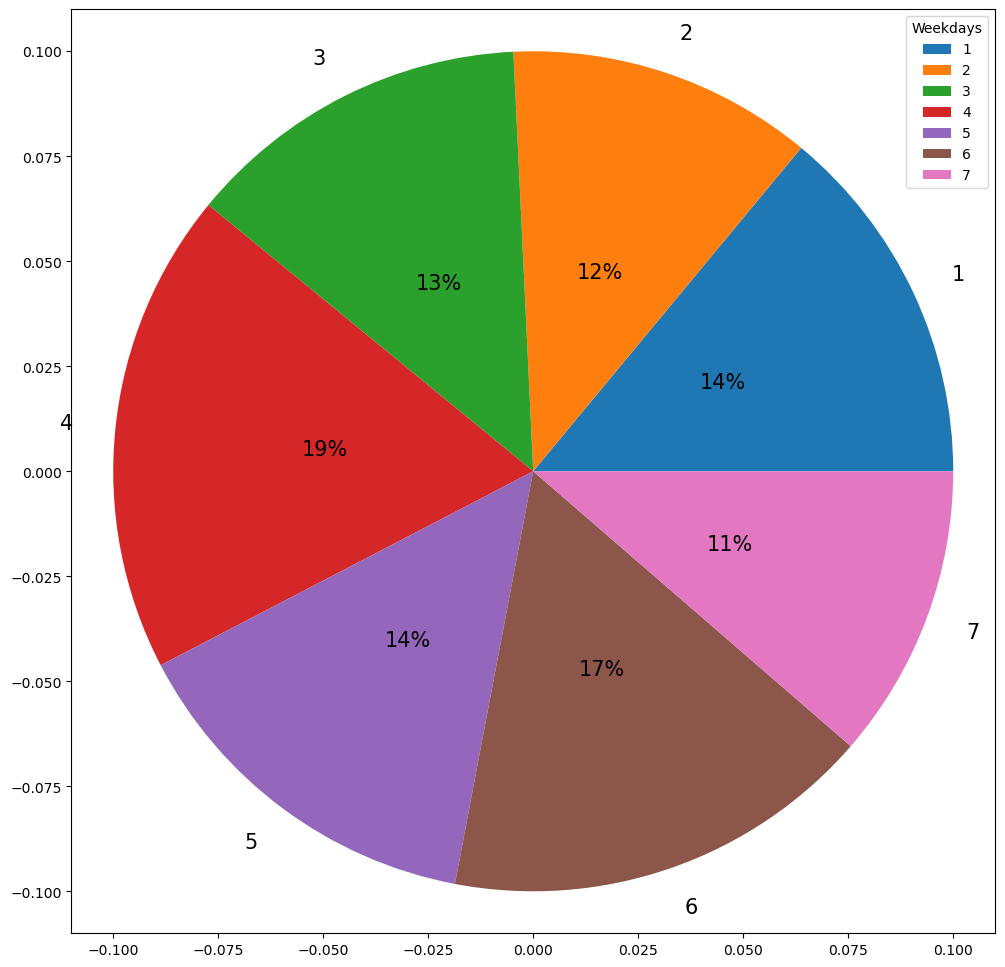

In [18]:
df_weekday=pd.DataFrame(data.groupby(['Weekday'])['amount'].sum()).sort_values(['Weekday'],ascending=True)  ## sum
plt.figure(figsize=(19,12))

plt.pie(df_weekday.amount,labels=df_weekday.index,shadow=False,frame=True,radius=.1, pctdistance = 0.5, autopct = "%0.0f%%",textprops={"fontsize":15} )

plt.legend(title = "Weekdays", loc="upper right")
plt.show()

<Axes: >

<Figure size 1900x1000 with 0 Axes>

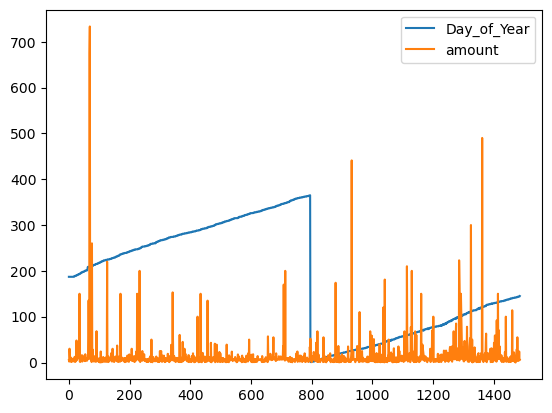

In [19]:
plt.figure(figsize=(19,10))
data[['Day_of_Year','amount']].plot()   ## operational count

<Axes: >

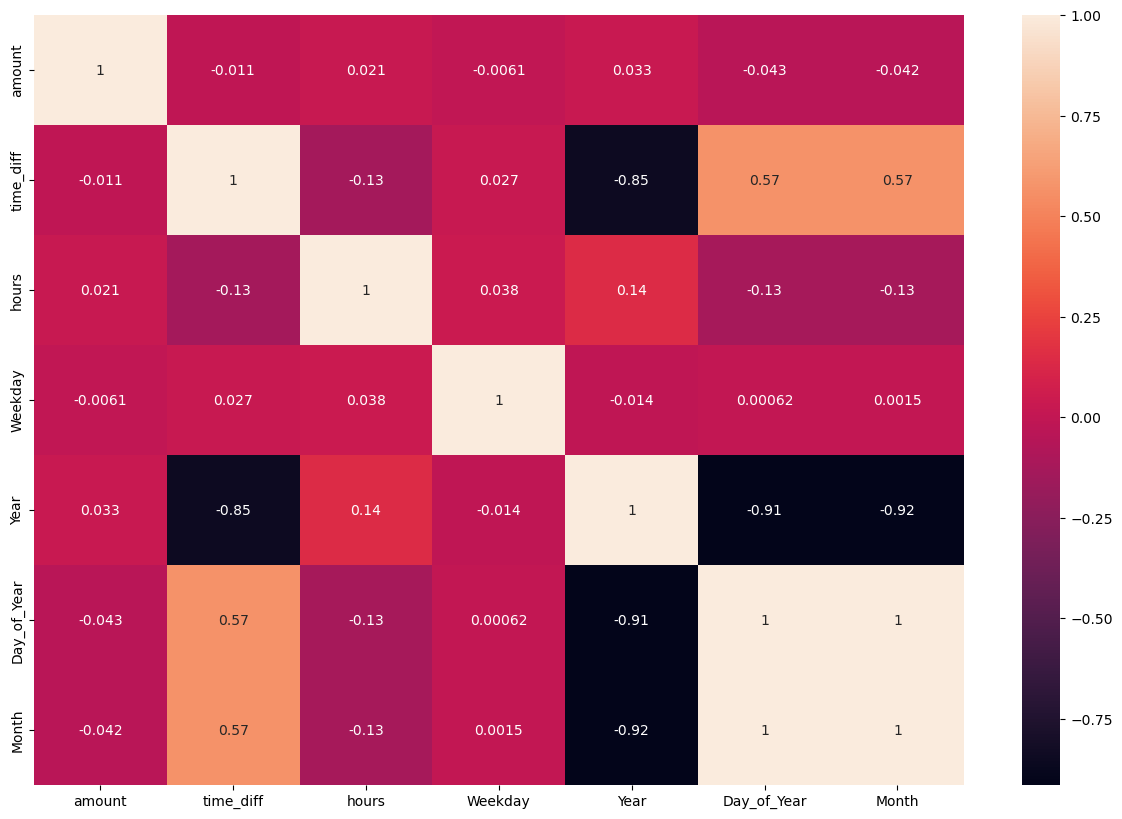

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

Amount volume outliers: ['Communal' 'Clothing' 'Motel' 'Travel' 'Rent Car' 'Learning' 'Events'
 'Restuarant' 'joy' 'Health' 'Sport']


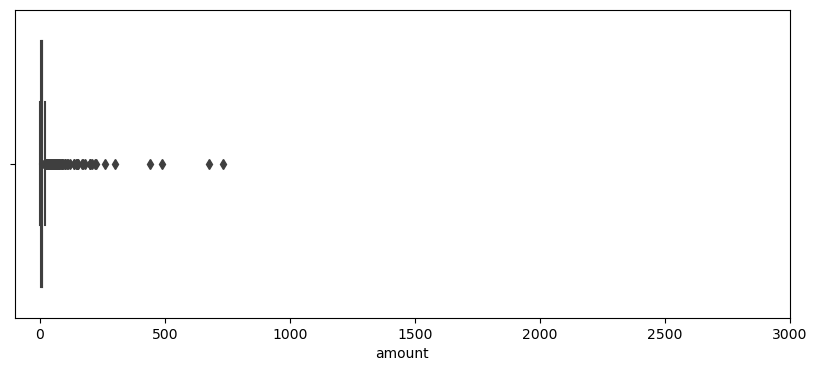

In [21]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=data['amount'])
print('Amount volume outliers:',data['category'][data['amount']>70].unique())

## Data Preparation For Modelling

In [22]:
data

,date_time,category,amount,time_diff,hours,Weekday,Year,Day_of_Year,Month
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,325,5,3,2022,187,7
1,2022-07-06 05:57:27+00:00,Market,2.00,325,5,3,2022,187,7
2,2022-07-06 05:58:12+00:00,Coffe,30.10,325,5,3,2022,187,7
3,2022-07-06 05:58:25+00:00,Market,17.33,325,5,3,2022,187,7
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,325,5,3,2022,187,7
...,...,...,...,...,...,...,...,...,...
1482,2023-05-24 07:42:46+00:00,Phone,5.00,3,7,3,2023,144,5
1483,2023-05-24 10:02:04+00:00,Business lunch,6.00,2,10,3,2023,144,5
1484,2023-05-24 16:55:40+00:00,Coffe,24.00,2,16,3,2023,144,5
1485,2023-05-24 19:11:54+00:00,Transport,5.00,2,19,3,2023,144,5


In [23]:
target=data.amount
target

0        5.50
1        2.00
2       30.10
3       17.33
4        5.50
        ...  
1482     5.00
1483     6.00
1484    24.00
1485     5.00
1486     5.81
Name: amount, Length: 1487, dtype: float64

In [24]:
features = data.drop(columns=['date_time','amount'])
features

,category,time_diff,hours,Weekday,Year,Day_of_Year,Month
0,Restuarant,325,5,3,2022,187,7
1,Market,325,5,3,2022,187,7
2,Coffe,325,5,3,2022,187,7
3,Market,325,5,3,2022,187,7
4,Restuarant,325,5,3,2022,187,7
...,...,...,...,...,...,...,...
1482,Phone,3,7,3,2023,144,5
1483,Business lunch,2,10,3,2023,144,5
1484,Coffe,2,16,3,2023,144,5
1485,Transport,2,19,3,2023,144,5


## Encoding

In [25]:
features = pd.get_dummies(features, columns = ['category'],drop_first=True)
features

,time_diff,hours,Weekday,Year,Day_of_Year,Month,category_Clothing,category_Coffe,category_Communal,category_Events,...,category_Other,category_Phone,category_Rent Car,category_Restuarant,category_Sport,category_Taxi,category_Tech,category_Transport,category_Travel,category_joy
0,325,5,3,2022,187,7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,325,5,3,2022,187,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,325,5,3,2022,187,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,325,5,3,2022,187,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,325,5,3,2022,187,7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,3,7,3,2023,144,5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1483,2,10,3,2023,144,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1484,2,16,3,2023,144,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1485,2,19,3,2023,144,5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
print(features.shape)
print(target.shape)

(1487, 25)
(1487,)


## Splitting

In [27]:
X_train,X_test, Y_train,Y_test = train_test_split(features,target, test_size = 0.3, random_state = 1)

## Scaling

In [28]:
# Create a StandardScaler object
scaler = StandardScaler()

scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Prediction on RandomForest

In [29]:
rf = RandomForestRegressor(n_estimators=1024,max_depth=64,min_samples_leaf=8,min_samples_split=8)

In [30]:
rf.fit(X_train_scaled,Y_train)

RandomForestRegressor(max_depth=64, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=1024)

In [31]:
prediction = rf.predict(X_test_scaled)

## Accuracy Metrics

In [32]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, prediction)
rmse = mean_squared_error(Y_test, prediction, squared=False)
mae = mean_absolute_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)

# Perform cross-validation and calculate the mean score
scores = cross_val_score(rf, features, target, cv=5)
mean_score = scores.mean()

# Print the mean score
print(f"Mean cross-validation score: {mean_score}")

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Mean cross-validation score: 0.2328059920396314
Mean Squared Error (MSE): 585.0254868169405
Root Mean Squared Error (RMSE): 24.187300114252945
Mean Absolute Error (MAE): 11.13350415415322
R-squared (R^2): 0.11845202199933114


## Deploying Model

In [44]:
## saving model
filename = 'rf.pkl'
pkl.dump(rf, open(filename, 'wb'))
loaded_model = pkl.load(open(filename, 'rb')) 

## deploying
result = loaded_model.score(X_train_scaled, Y_train)
print(result)

0.2912087401745289


In [46]:
## creating function
def predict_feature_expenses(category, month):
    # Filter the data for the specified category
    category_data = data[data['category'] == category].copy()

    # Generate features for prediction
    data['date_time'] = pd.to_datetime(data['date_time'])
    current_datetime = datetime.now(timezone('UTC'))
    data['time_diff'] = (current_datetime - data['date_time']).dt.days
    data['hours'] = data['date_time'].dt.hour
    data['Weekday'] = data['date_time'].dt.weekday + 1
    data['Year'] = data['date_time'].dt.year
    data['Day_of_Year'] = data['date_time'].dt.strftime('%j').astype(int)
    data['Month'] = data['date_time'].dt.month

    # Split the data into features (X) and target variable (y)
    X = category_data[['time_diff', 'Month', 'Weekday', 'Year', 'Day_of_Year', 'hours']]
    y = category_data['amount']

    # Create a pipeline with feature scaling and regression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor())
    ])

    # Train the pipeline
    pipeline.fit(X, y)

    # Prepare data for prediction
    future_date = datetime.now() + timedelta(days=30 * month)
    future_data = pd.DataFrame({
        'time_diff': [(datetime.now() - future_date).days],
        'Month': [future_date.month],
        'Weekday': [future_date.weekday() + 1],
        'Year': [future_date.year],
        'Day_of_Year': [(future_date - datetime(future_date.year, 1, 1)).days + 1],
        'hours': [future_date.hour]
    }, columns=X.columns)

    # Make predictions for the future data
    predicted_expenses = pipeline.predict(future_data)

    return predicted_expenses


## deploying
predicted_expenses = predict_feature_expenses('Coffe', 1)
print(f"Predicted expenses for coffee, 1 month later: {predicted_expenses}")

Predicted expenses for coffee, 1 month later: [16.293]


## Feature Impacts

In [36]:
feature_names= features.columns

In [37]:
importance_scores = rf.feature_importances_

In [38]:
sorted_indices = importance_scores.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importance_scores = importance_scores[sorted_indices]

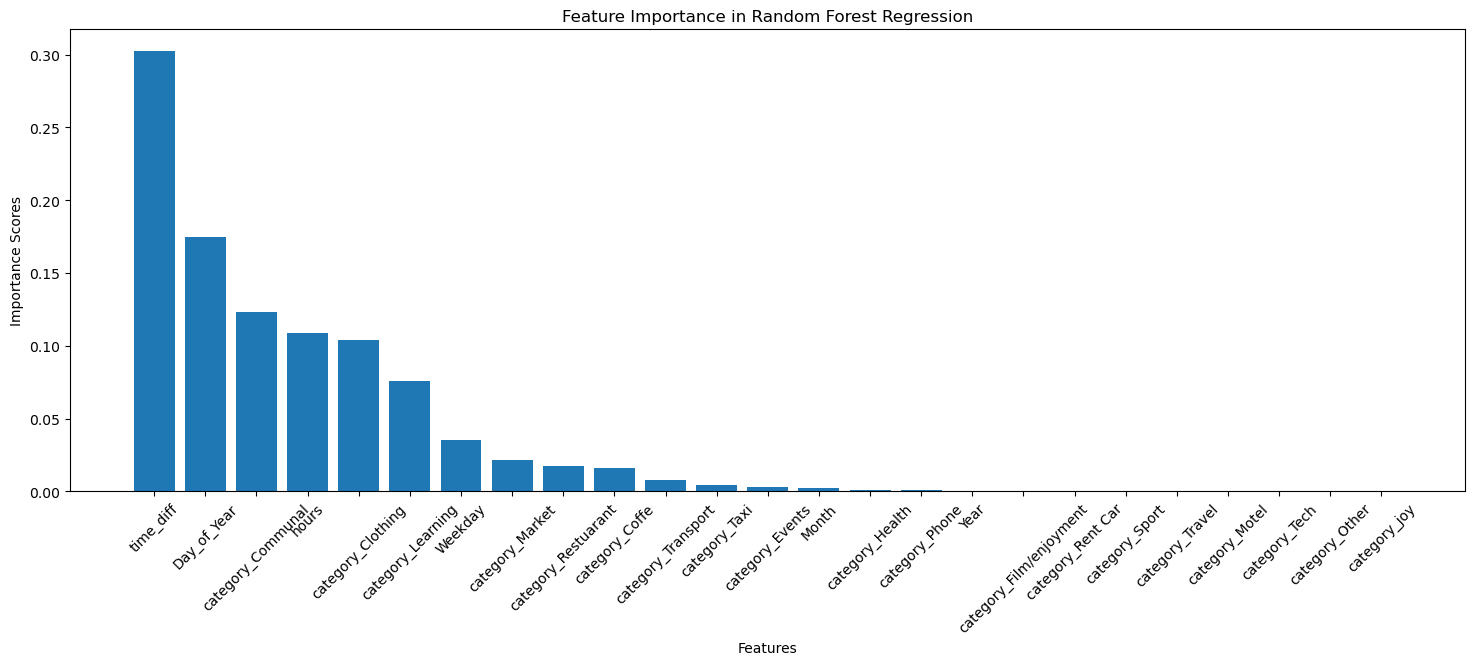

In [39]:
# Plot feature importance
plt.figure(figsize=(18, 6))
plt.bar(range(len(sorted_importance_scores)), sorted_importance_scores, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance in Random Forest Regression')
plt.xticks(rotation=45)
plt.show()